In [1]:
import os
import numpy as np
#assumes labelled data ra stored into a positive and negative folder
#returns two lists one with the text per file and another with the corresponding class 
#path_baptiste = "/home/baptiste/Documents/data/train"
path_sofia = "/Users/Flukmacdesof/data 2/train"

def loadLabeled(path):

	rootdirPOS =path+'/pos'
	rootdirNEG =path+'/neg'
	data=[]
	Class=[]
	count=0
	for subdir, dirs, files in os.walk(rootdirPOS):
		
		for file in files:
			with open(rootdirPOS+"/"+file, 'r') as content_file:
				content = content_file.read() #assume that there are NO "new line characters"
				data.append(content)
	tmpc1=np.ones(len(data))
	for subdir, dirs, files in os.walk(rootdirNEG):
		
		for file in files:
			with open(rootdirNEG+"/"+file, 'r') as content_file:
				content = content_file.read() #assume that there are NO "new line characters"
				data.append(content)
	tmpc0=np.zeros(len(data)-len(tmpc1))
	Class=np.concatenate((tmpc1,tmpc0),axis=0)
	return data,Class
#loads unlabelled data	
#returns two lists
#one with the data per file and another with the respective filenames (without the file extension)
def loadUknown(path):
	rootdir=path
	data=[]
	names=[]
	for subdir, dirs, files in os.walk(rootdir):
		for file in files:
			with open(rootdir+"/"+file, 'r') as content_file:
				content = content_file.read() #assume that there are NO "new line characters"
				data.append(content)
				names.append(file.split(".")[0])
	return data,names

In [2]:
data_train = loadLabeled(path_sofia)

In [3]:
excla = [0]*len(data_train[0])
inter = [0]*len(data_train[0])
susp = [0]*len(data_train[0])
for i, review in enumerate(data_train[0]):
    for char in review:
        if char == "?":
            inter[i] += 1
        elif char == "!":
            excla[i] += 1

In [4]:
from nltk.tokenize.casual import TweetTokenizer
ttoken = TweetTokenizer(reduce_len=True)
tokenized_reviews = []

for review in data_train[0]:
    tokenized_reviews.append(ttoken.tokenize(review))

In [5]:
for i, review in enumerate(tokenized_reviews):
    for word in review:
        if word == "...":
            susp[i] += 1

In [10]:
import string

In [58]:
potential_smiley=set()
for i, review in enumerate(tokenized_reviews):
    for w in review :
        if len(w)>1 and len(w)<5 and any(
                [
                    string.punctuation[i] in w for i in range(len(string.punctuation))
                ]
            ):
            potential_smiley.add(w)            


0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000


<a list of 50 Patch objects>

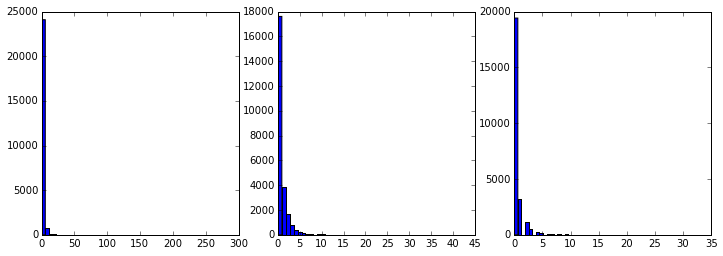

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
ax[0].hist(excla, bins=50)[2]
ax[1].hist(inter, bins=50)[2]
ax[2].hist(susp, bins=50)[2]

In [7]:
u_excla = pd.unique(excla)
u_inter = pd.unique(inter)
u_susp = pd.unique(susp)

In [8]:
plot_excla = {}
plot_inter = {}
plot_susp = {}
dicts = [
    [np.array(plot_excla), sorted(u_excla), excla],
    [np.array(plot_inter), sorted(u_inter), inter], 
    [np.array(plot_susp), sorted(u_susp), susp]
]
for dic in dicts: 
    dic[0]={key: np.mean(data_train[1][np.where(dic[2]==key)]) for key in dic[1]}

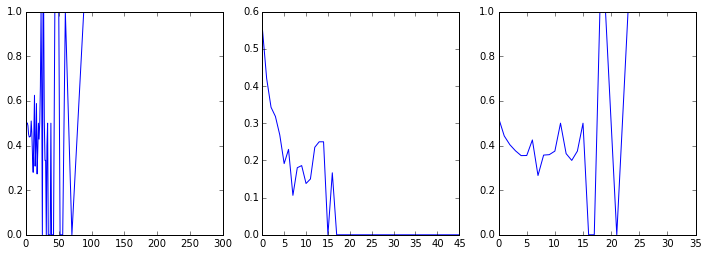

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

for i in range(3) :
    ax[i].plot(*zip(*sorted(dicts[i][0].items())))

Le nombre de points d'interrogation semblent corrélés avec la bonne / mauvaise opinion

In [99]:
happy = [":-)", ":)", ":D", ":o)", ":]", ":3", ":c)", ":>", "=]", "8)", "=)", ":}", ":^)", ":っ)", ":-))"]
laughing = [":-D", "8-D", "8D", "x-D", "xD", "X-D", "XD", "=-D", "=D", "=-3", "=3", "B^D"]
sad = [">:[", ":-(", ":(", ":-c", ":c", ":-<", ":<", ":-[", ":[", ":{", ";("]
cry = [":'-(", ":'("]
happy_cry = [":'-)", ":')"]
horror = ["D:<", "D:", "D8", "D;", "D=", "DX", "v.v", "D-':"]
surprised = [">:O", ":-O", ":O", ":-o", ":o", "8-0", "O_O", "o-o", "O_o", "o_O", "o_o", "O-O"]
kiss= [":*", ":^*", "( '}{' )"]
wink = [";-)", ";)", "*-)", "*)", ";-]", ";]", ";D", ";^)", ":-"]
tongue = [">:P", ":-P", ":P", "X-P", "x-p", "xp", "XP", ":-p", ":p", "=p", ":-b", ":b", "d:"]
skeptical = [">:\ ".replace(" ", ""), ">:/", ":-/", ":-.", ":/", ":\ ".replace(" ", ""), "=/", "=\ ".replace(" ", ""), ":L", "=L", ":S", ">.<"]
neutral = [":|", ":-|"]
embarassed = ":$"
sealed_lips = [":-X", ":X", ":-#", ":#"]
angel = ["O:-)", "0:-3", "0:3", "0:-)", "0:)", "0;^)"]
evil = [">:)", ">;)", ">:-)", "}:-)", "}:)", "3:-)", "3:)"]
high_five = ["o/\o", "^5", ">_>^ ^<_<"]
heart = ["<3"]
broken_hart = ["</3"]
smiley_list = [
laughing,
sad,
cry,
happy_cry,
horror,
surprised,
kiss,
wink,
tongue,
skeptical,
neutral,
embarassed,
sealed_lips,
angel,
evil,
high_five,
heart,
broken_hart]

In [79]:
def gen_features_smiley(tokenized_text, smiley_list):
    features_smiley = np.zeros((len(tokenized_text),len(smiley_list)))
    for i, review in enumerate(tokenized_text):
        if i % 1000 == 0:
            print i
        for w in review :
            if len(w)<2 : 
                pass
            elif len(w)>5:
                pass
            for j, cat in enumerate(smiley_list):
                if w in cat:
                    features_smiley[i,j] = 1
    return features_smiley

In [100]:
smiley_list

[[':-D',
  '8-D',
  '8D',
  'x-D',
  'xD',
  'X-D',
  'XD',
  '=-D',
  '=D',
  '=-3',
  '=3',
  'B^D'],
 ['>:[', ':-(', ':(', ':-c', ':c', ':-<', ':<', ':-[', ':[', ':{', ';('],
 [":'-(", ":'("],
 [":'-)", ":')"],
 ['D:<', 'D:', 'D8', 'D;', 'D=', 'DX', 'v.v', "D-':"],
 ['>:O',
  ':-O',
  ':O',
  ':-o',
  ':o',
  '8-0',
  'O_O',
  'o-o',
  'O_o',
  'o_O',
  'o_o',
  'O-O'],
 [':*', ':^*', "( '}{' )"],
 [';-)', ';)', '*-)', '*)', ';-]', ';]', ';D', ';^)', ':-'],
 ['>:P',
  ':-P',
  ':P',
  'X-P',
  'x-p',
  'xp',
  'XP',
  ':-p',
  ':p',
  '=p',
  ':-b',
  ':b',
  'd:'],
 ['>:\\',
  '>:/',
  ':-/',
  ':-.',
  ':/',
  ':\\',
  '=/',
  '=\\',
  ':L',
  '=L',
  ':S',
  '>.<'],
 [':|', ':-|'],
 ':$',
 [':-X', ':X', ':-#', ':#'],
 ['O:-)', '0:-3', '0:3', '0:-)', '0:)', '0;^)'],
 ['>:)', '>;)', '>:-)', '}:-)', '}:)', '3:-)', '3:)'],
 ['o/\\o', '^5', '>_>^ ^<_<'],
 ['<3'],
 ['</3']]

In [101]:
features_smiley = gen_features_smiley(tokenized_reviews, smiley_list)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000


In [102]:
for i in np.where(np.sum(features_smiley, axis=0) >10)[0]:
    print smiley_list[i]

[':-D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D', '=-3', '=3', 'B^D']
['>:[', ':-(', ':(', ':-c', ':c', ':-<', ':<', ':-[', ':[', ':{', ';(']
[';-)', ';)', '*-)', '*)', ';-]', ';]', ';D', ';^)', ':-']
['>:P', ':-P', ':P', 'X-P', 'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', 'd:']
:$


In [93]:
smiley_list[np.where(np.sum(features_smiley, axis=0) >10)[0]]

TypeError: only integer arrays with one element can be converted to an index

In [ ]:
np.zeros((len(tokenized_reviews),len(smiley_list)))